In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
w_glass = cv2.imread('image_01.png',1)
wo_glass = cv2.imread('image_02.png', 1)
group = cv2.imread('image_03.png', 1)

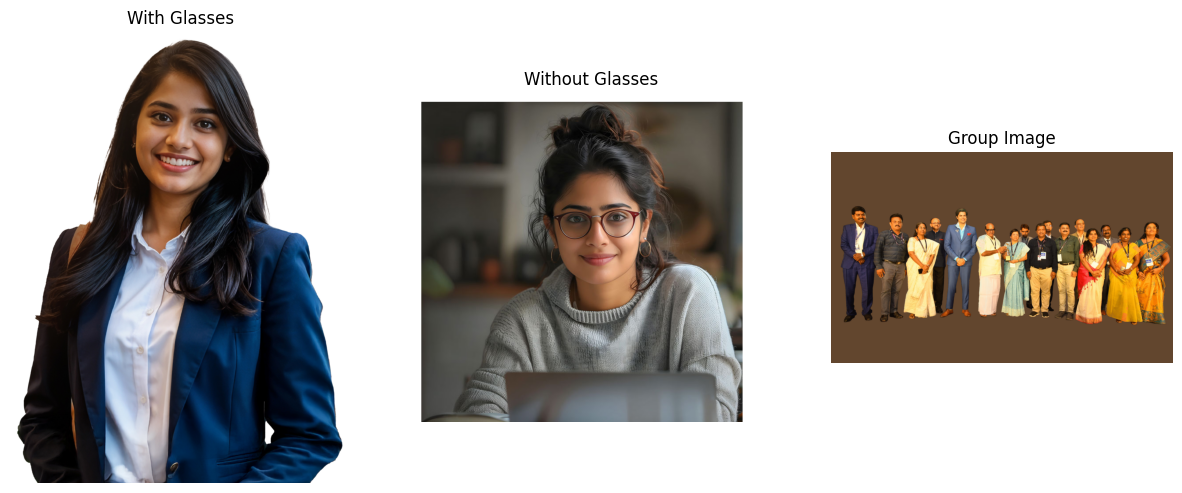

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass[:,:,::-1]);plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass[:,:,::-1]);plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group[:,:,::-1]);plt.title('Group Image');plt.axis('off')
plt.show()

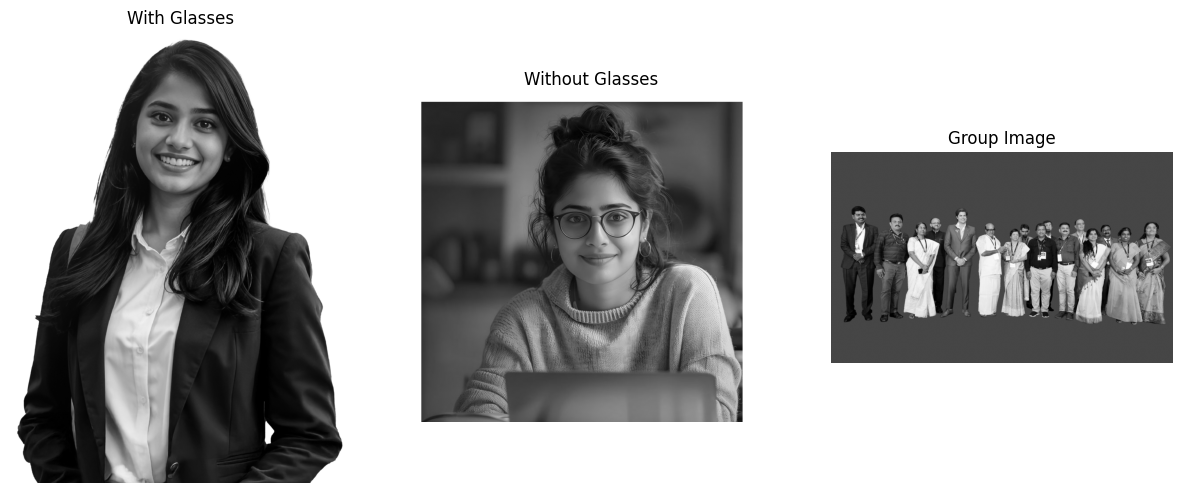

In [4]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1);plt.imshow(cv2.cvtColor(w_glass, cv2.COLOR_BGR2GRAY), cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(cv2.cvtColor(wo_glass, cv2.COLOR_BGR2GRAY), cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(cv2.cvtColor(group, cv2.COLOR_BGR2GRAY), cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()


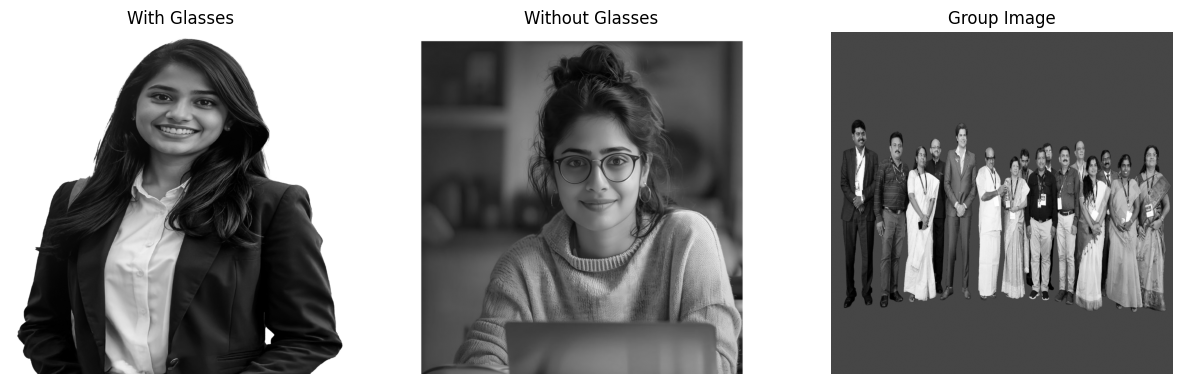

In [5]:
w_glass_gray = cv2.resize(cv2.cvtColor(w_glass, cv2.COLOR_BGR2GRAY), (1000, 1000))
wo_glass_gray = cv2.resize(cv2.cvtColor(wo_glass, cv2.COLOR_BGR2GRAY), (1000, 1000))
group_gray = cv2.resize(cv2.cvtColor(group, cv2.COLOR_BGR2GRAY), (1000, 1000))

plt.figure(figsize=(15,10))

plt.subplot(1,3,1);plt.imshow(w_glass_gray,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass_gray,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group_gray,cmap='gray');plt.title('Group Image');plt.axis('off')

plt.show()

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_and_display(image):
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 15)
    plt.imshow(image[:,:,::-1])
    plt.axis('off')
    plt.show()


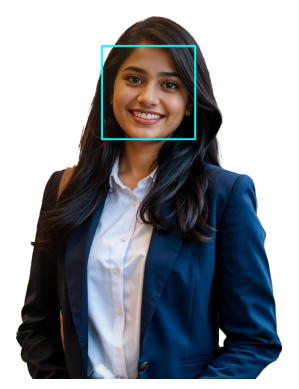

In [8]:
result = detect_and_display(w_glass)

In [9]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
def detect_eyes(image):
    face_img = image.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return face_img

In [10]:
w_glass = detect_eyes(w_glass)
wo_glass = detect_eyes(wo_glass)
group = detect_eyes(group)

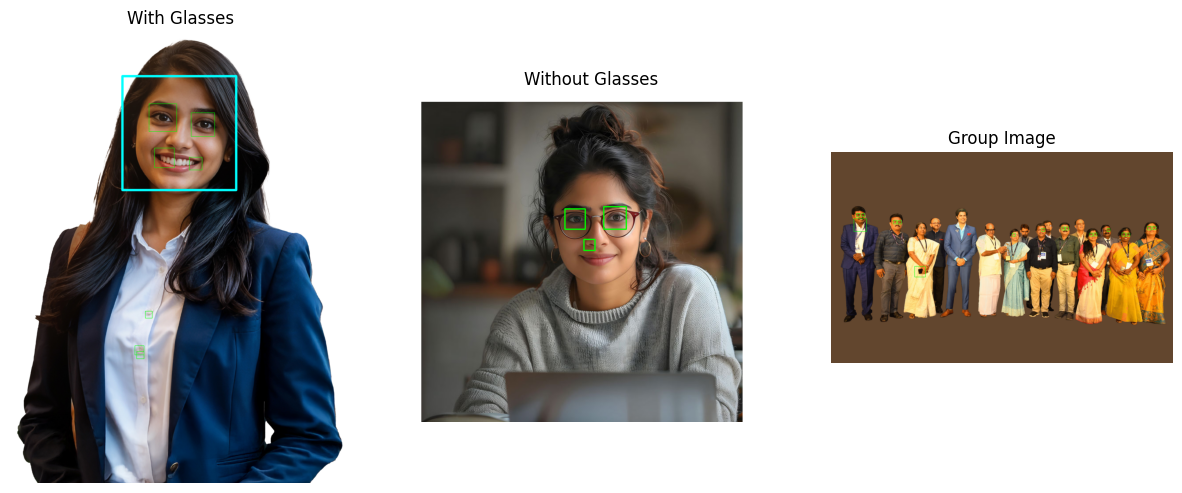

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass[:,:,::-1]);plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass[:,:,::-1]);plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group[:,:,::-1]);plt.title('Group Image');plt.axis('off')
plt.show()

Press 'q' to quit and save the video, or 's' to save a single frame.


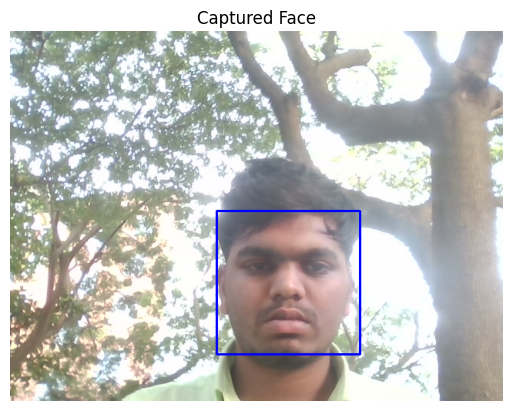

In [16]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('face_detection_output.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))
print("Press 'q' to quit and save the video, or 's' to save a single frame.")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    out.write(frame)
    cv2.imshow('Video Face Detection', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  
        break
    elif key == ord('s'):  
        cv2.imwrite('captured_face.png', frame)
        break

cap.release()
out.release()
cv2.destroyAllWindows()

try:
    captured_image = cv2.imread('captured_face.png', 1)
    if captured_image is not None:
        plt.imshow(cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB))
        plt.title('Captured Face')
        plt.axis('off')
        plt.show()
except:
    print("No image was captured.")

from IPython.display import Video
Video('face_detection_output.avi', embed=True)


Press 'q' to quit and save video, or 's' to save a frame snapshot.


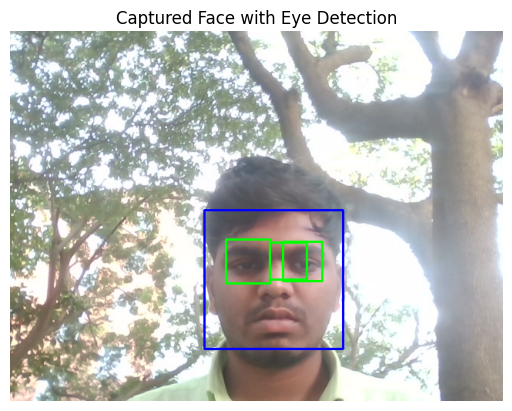

In [17]:
def new_detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame
video_capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('face_eye_detection_output.avi', fourcc, 20.0,
                      (int(video_capture.get(3)), int(video_capture.get(4))))

print("Press 'q' to quit and save video, or 's' to save a frame snapshot.")

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = new_detect(gray, frame)

    out.write(canvas)

    cv2.imshow('Video - Face & Eye Detection', canvas)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite('captured_face_eye.png', frame)
        break

video_capture.release()
out.release()
cv2.destroyAllWindows()

try:
    captured_image = cv2.imread('captured_face_eye.png', 1)
    if captured_image is not None:
        plt.imshow(cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB))
        plt.title('Captured Face with Eye Detection')
        plt.axis('off')
        plt.show()
except:
    print("No image was captured.")

Video('face_eye_detection_output.avi', embed=True)
